# Table of Contents
* [Introduction](#Introduction)
	* [Dynamic Network Analysis of Enron Email Network Data](#Dynamic-Network-Analysis-of-Enron-Email-Network-Data)
	* [Data Preprocessing](#Data-Preprocessing)
* [Import Libraries](#Import-Libraries)
* [Import Data](#Import-Data)
* [Data Partition](#Data-Partition)
	* [Break data into years](#Break-data-into-years)
	* [Create networks at different timesteps](#Create-networks-at-different-timesteps)
		* [t = 0](#t-=-0)
		* [t =1](#t-=1)
		* [t = 2](#t-=-2)
		* [t = 3](#t-=-3)
		* [t = 4](#t-=-4)
		* [t = 5](#t-=-5)


# Introduction

## Dynamic Network Analysis of Enron Email Network Data

I use the Enron email network data from [John Hopkins](http://cis.jhu.edu/~parky/Enron/enron.html) which has time, sender and receiver pair format data.

## Data Preprocessing

From the JHU data, I have done the following in Excel:
- The first column represents seconds elapsed since 1 January 1970, so I convert this in to days
- I then add these days to the date to get time stamps for all nodes
- From the timestamps, I extract the year field
- The network can be partitioned by year in a cumulative manner for DNA

# Import Libraries

In [55]:
import pandas as pd
import numpy as np
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline
sns.set(style="whitegrid", color_codes=True)
import random
random.seed(1111111111111)
plt.rc('axes', grid=False, titlesize='large', labelsize='large',labelweight='heavy')
plt.rc('lines', linewidth=4)
plt.rc('font',family='serif',size=16, serif='Georgia')
plt.rc('figure', figsize = (15,6),titlesize='large',titleweight='heavy')
plt.rc('grid',linewidth=3)


# Import Data

In [7]:
data = pd.read_excel("../Data/execs.email.linesnum.xlsx")

In [8]:
data.head()

,sec,to,from,date,year
0,315522000,24,153,1979-12-31 21:00:00,1979
1,315522000,24,153,1979-12-31 21:00:00,1979
2,315522000,29,29,1979-12-31 21:00:00,1979
3,315522000,29,29,1979-12-31 21:00:00,1979
4,315522000,29,29,1979-12-31 21:00:00,1979


In [9]:
data.min()

sec               315522000
to                        0
from                      0
date    1979-12-31 21:00:00
year                   1979
dtype: object

In [10]:
data.max()

sec              1024688419
to                      183
from                    183
date    2002-06-21 19:40:19
year                   2002
dtype: object

# Data Partition

In [11]:
year = data['year'].unique()
year


array([1979, 1998, 1999, 2000, 2001, 2002], dtype=int64)

In [12]:
data.drop(["sec", "date"], axis=1,inplace=True)

In [13]:
data.head()

,to,from,year
0,24,153,1979
1,24,153,1979
2,29,29,1979
3,29,29,1979
4,29,29,1979


## Break data into years

In [14]:
G0 = data[data["year"]==year[0]]
G1 = data[data["year"]==year[1]]
G2 = data[data["year"]==year[2]]
G3 = data[data["year"]==year[3]]
G4 = data[data["year"]==year[4]]
G5 = data[data["year"]==year[5]]

In [15]:
G1.head()

,to,from,year
174,114,169,1998
175,114,169,1998
176,114,123,1998
177,114,123,1998
178,114,123,1998


In [16]:
G2.head()

,to,from,year
256,114,65,1999
257,114,65,1999
258,114,169,1999
259,114,169,1999
260,114,112,1999


In [17]:
G3.head()

,to,from,year
3971,82,51,2000
3972,82,51,2000
3973,82,51,2000
3974,82,51,2000
3975,82,51,2000


## Create networks at different timesteps

### t = 0

In [34]:
G0_ = np.asarray(G0.ix[:,:2])

In [35]:
Gt0 = nx.Graph()

In [36]:
Gt0= nx.from_edgelist(G0_)

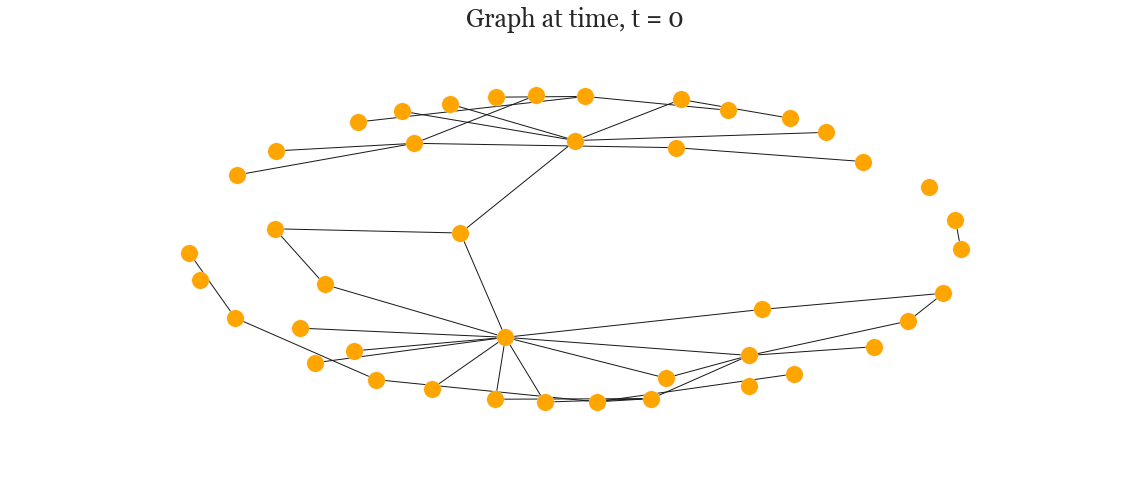

In [64]:
nx.draw_spring(Gt0, cmap=plt.cm.inferno, node_color='#FFA500')
plt.title("Graph at time, t = 0", fontsize=25)
plt.show()

### t =1

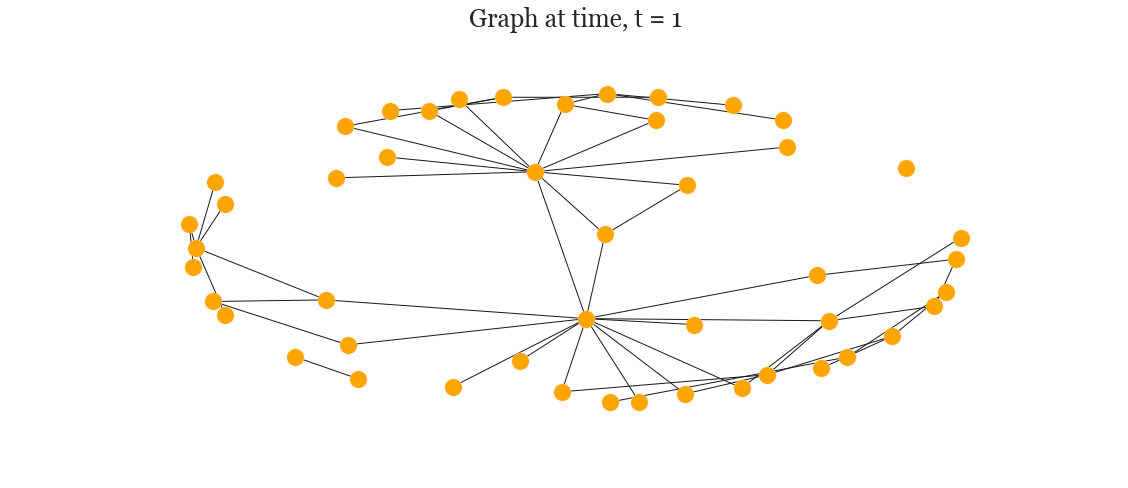

In [65]:
G1_ = G1.ix[:,:2]
G1_ = np.concatenate((G1_,G0_), axis=0)
Gt1 = nx.Graph()
Gt1= nx.from_edgelist(G1_)

#draq graph 
nx.draw_spring(Gt1, cmap=plt.cm.inferno, node_color='#FFA500')
plt.title("Graph at time, t = 1", fontsize=25)
plt.show()

### t = 2

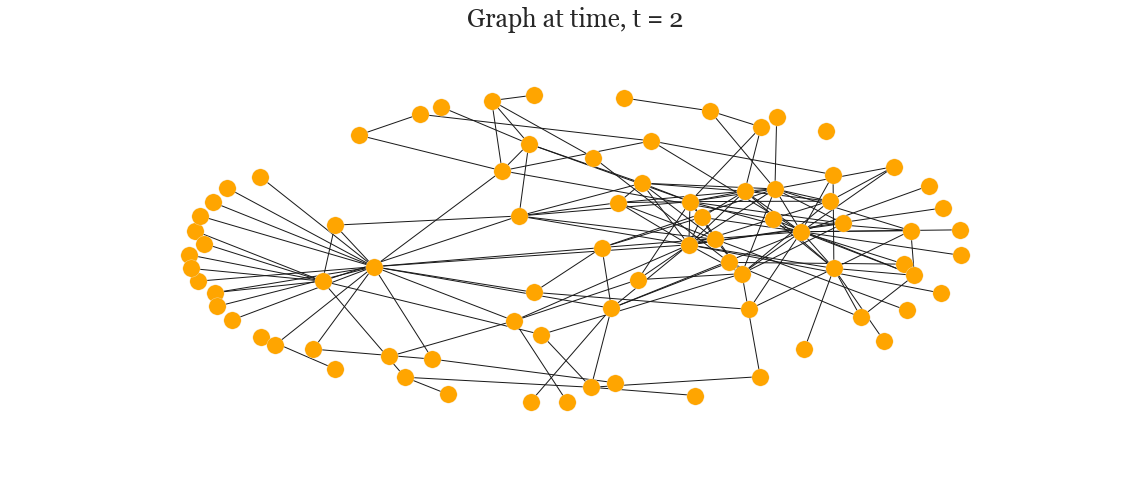

In [66]:
G2_ = G2.ix[:,:2]
G2_ = np.concatenate((G2_,G1_), axis=0)
Gt2 = nx.Graph()
Gt2= nx.from_edgelist(G2_)

#draq graph 
nx.draw_spring(Gt2, cmap=plt.cm.inferno, node_color='#FFA500')
plt.title("Graph at time, t = 2", fontsize=25)
plt.show()

### t = 3

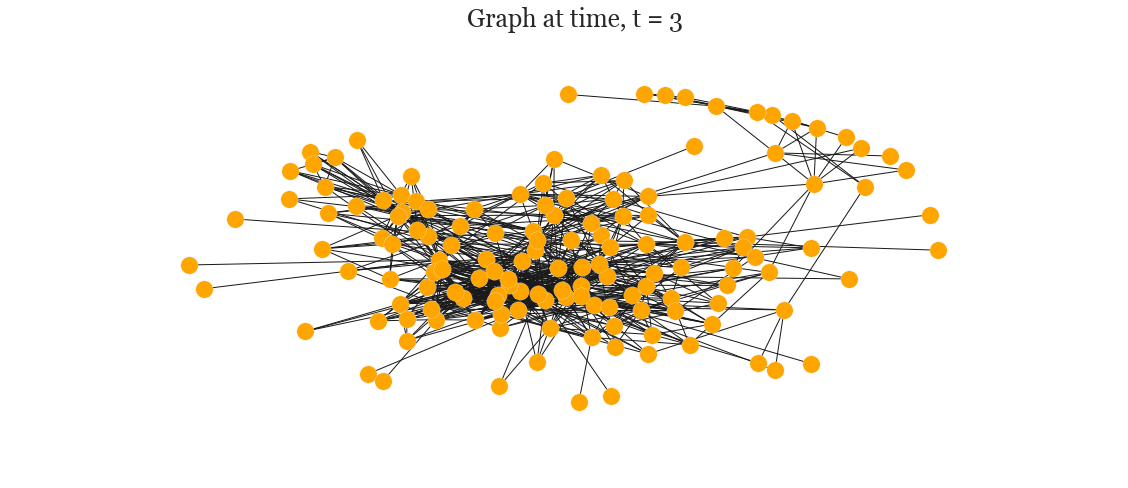

In [67]:
G3_ = G3.ix[:,:2]
G3_ = np.concatenate((G3_,G2_), axis=0)
Gt3 = nx.Graph()
Gt3= nx.from_edgelist(G3_)

#draq graph 
nx.draw_spring(Gt3, cmap=plt.cm.inferno, node_color='#FFA500')
plt.title("Graph at time, t = 3", fontsize=25)
plt.show()

### t = 4

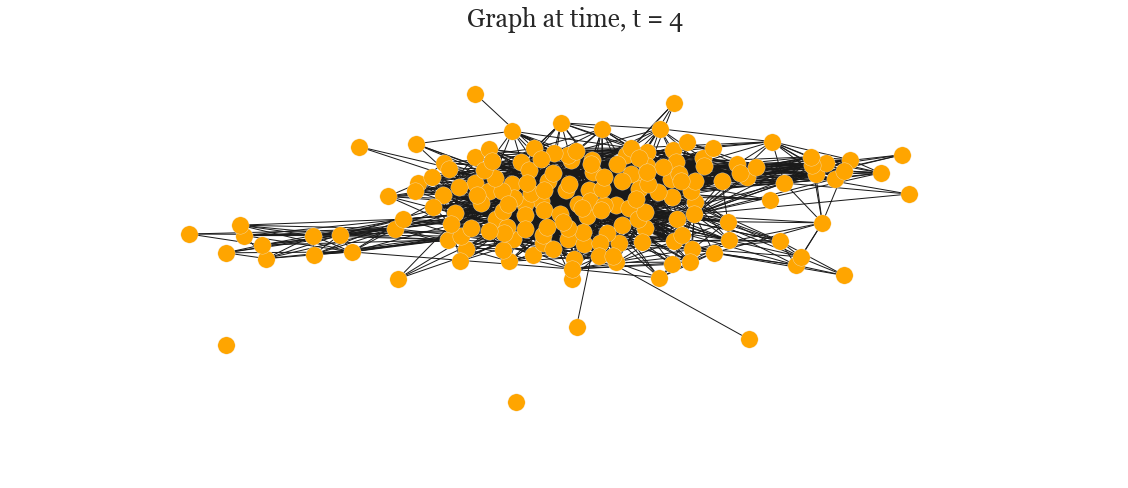

In [68]:
G4_ = G4.ix[:,:2]
G4_ = np.concatenate((G4_,G3_), axis=0)
Gt4 = nx.Graph()
Gt4= nx.from_edgelist(G4_)

#draq graph 
nx.draw_spring(Gt4, cmap=plt.cm.inferno, node_color='#FFA500')
plt.title("Graph at time, t = 4", fontsize=25)
plt.show()

### t = 5

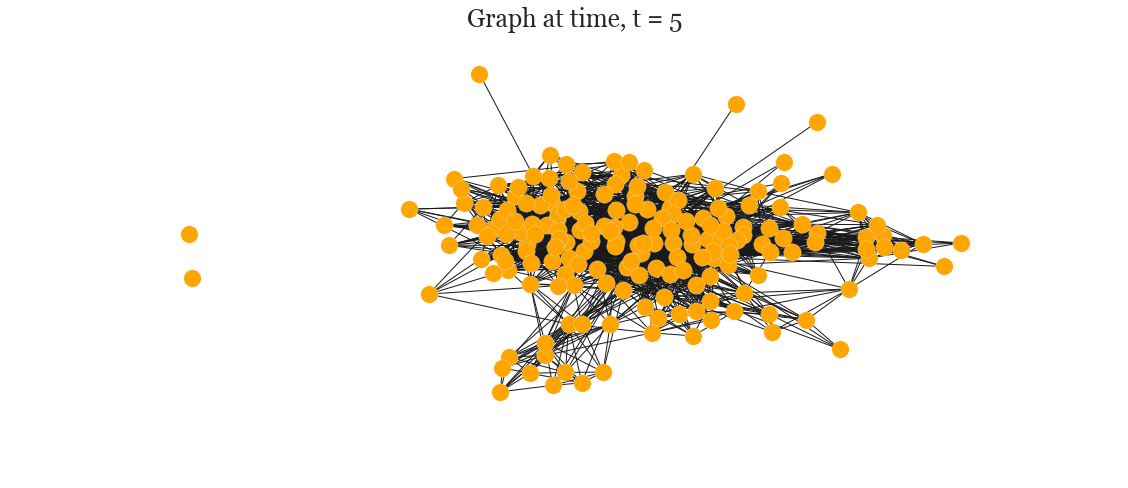

In [69]:
G5_ = G5.ix[:,:2]
G5_ = np.concatenate((G5_,G4_), axis=0)
Gt5 = nx.Graph()
Gt5= nx.from_edgelist(G5_)


nx.draw_spring(Gt5, cmap=plt.cm.inferno, node_color='#FFA500')
plt.title("Graph at time, t = 5",fontsize=25)
plt.show()

# Network Statistics

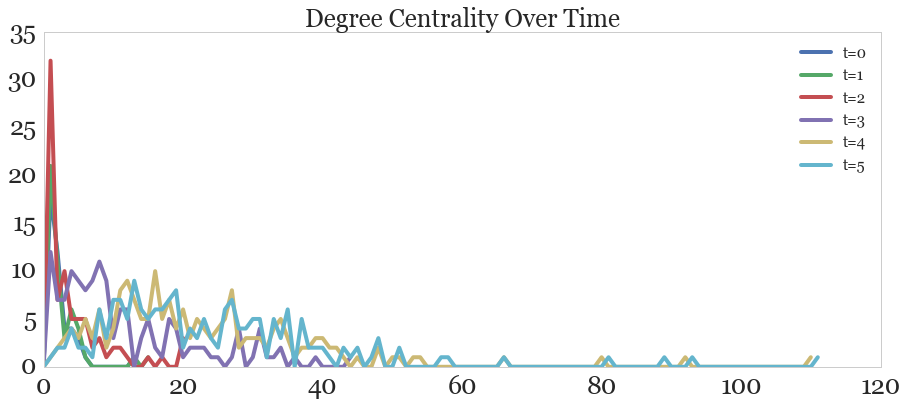

In [71]:
plt.title("Degree Centrality Over Time", fontsize=25)
plt.plot(nx.degree_histogram(Gt0), label='t=0')
plt.plot(nx.degree_histogram(Gt1), label='t=1')
plt.plot(nx.degree_histogram(Gt2), label='t=2')
plt.plot(nx.degree_histogram(Gt3), label='t=3')
plt.plot(nx.degree_histogram(Gt4), label='t=4')
plt.plot(nx.degree_histogram(Gt5), label='t=5')

plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.legend(loc=1, fontsize=15)